<a href="https://colab.research.google.com/github/poojak-shetty/Capstone-1/blob/master/Data_visualisation_and_selection(with_linear_regression_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have already cleaned our dataset and have kept only necessary columns.Now we need to visualize which features mostly affect the life expectancy .

# DATA VISUALIZATION

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
#importing necessary libraries is a common step

In [0]:
df = pd.read_csv('Train set.csv')
dff=pd.read_csv('Test set.csv')

In [65]:
df.head()

,Unnamed: 0,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Here,as we did 2 different csv files and saved it ,we are getting one more column named 'Unnamed:0' which occurs because its the index column in the dataset which we have saved.So,we need to remove that column.

In [0]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]
dff=dff.loc[:, ~dff.columns.str.match('Unnamed')]

In [67]:
df.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [68]:
dff.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Now lets do the data visualization part.I am using scatterplot to visualize my cleaned dataset

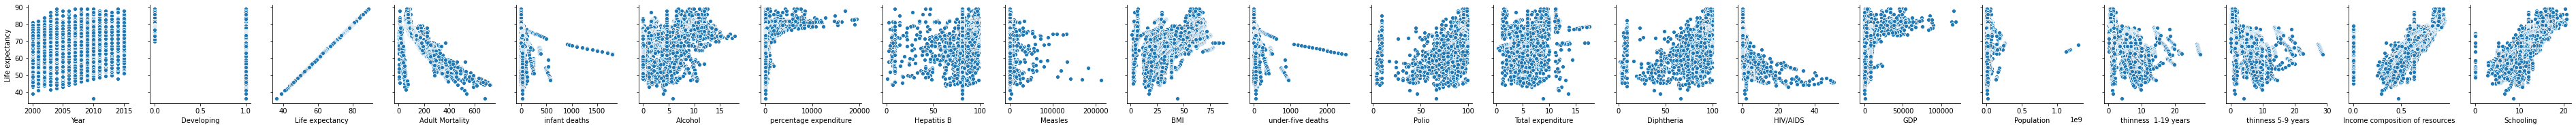

In [69]:
    %matplotlib inline
    plt.rcParams['figure.figsize']=5,5
    columns=list(df.columns.values)
    g=sns.pairplot(df,x_vars=columns,y_vars = ['Life expectancy '])

From the above plots we can say that,there are many features affecting the life expectancy.Mainly the Adult mortality,alcohol,hiv/aids .

# FEATURE SELECTION

For the feature selection there are different methods.The first one being data visualization which is already over.Now lets find the correlation and check.Correlation analysis is used to quantify the degree to which two variables are related

In [70]:
df.corr('pearson')['Life expectancy '].sort_values()

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556457
Developing                        -0.481962
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
under-five deaths                 -0.222503
infant deaths                     -0.196535
Measles                           -0.157574
Population                        -0.019638
Year                               0.169623
Hepatitis B                        0.203771
Total expenditure                  0.207981
percentage expenditure             0.381791
Alcohol                            0.391598
GDP                                0.430493
Polio                              0.461574
Diphtheria                         0.475418
 BMI                               0.559255
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

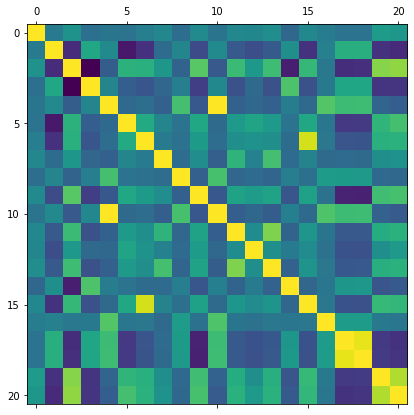

In [71]:
fig,ax=plt.subplots(figsize=(10,7))
ax.matshow(df.corr())

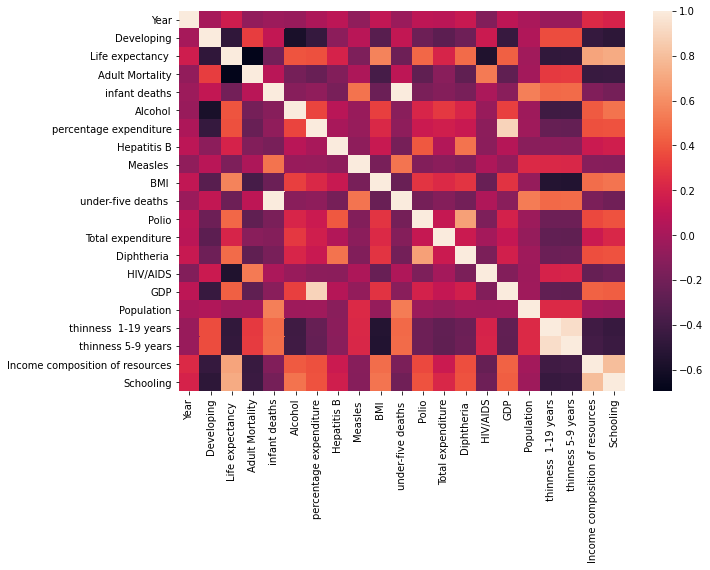

In [72]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,)

In [0]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

Normalization

In [0]:
df1=(df-df.min()) /(df.max()-df.min())

In [75]:
df1.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,1.0,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,1.0,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,1.0,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,1.0,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,1.0,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937


# LINEAR REGRESSION

Hypothesis function

In [0]:
def h(a,x,b):
  return (a*x)+b

Error function

In [0]:
def error(a,x,b,y):
  m=len(y)
  e=0
  for i in range(m):
    e+=np.power(h(a,x[i],b)-y[i],2)

  return e/(2*m)

Step gradient function

In [0]:
def step_gradient(a,x,b,y,learning_rate):
  grad_a=0
  grad_b=0
  m=len(y)
  for i in range(m):
    grad_a+=(1/m)*(h(a,x[i],b)-y[i])*x[i]
    grad_b+=(1/m)*(h(a,x[i],b)-y[i])

  a=a-(grad_a*learning_rate)
  b=b-(grad_b*learning_rate)

  return a,b

The final descend function to train the dataset

In [0]:
def descend(init_a,x,init_b,y,learning_rate,iter):
  a = init_a
  b = init_b

  for i in range(iter):
    if i%1000==0:
      print(f"Error: {error(a,x,b,y)} | a: {a} | b: {b}")
    a,b = step_gradient(a,x,b,y,learning_rate)

  return a, b

Initialising values

In [0]:
a=0
b=0
learning_rate=0.01

The initial plot with the highly correlated feature 'Adult Mortality'

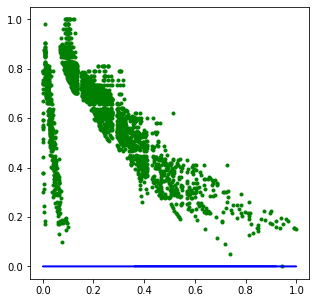

In [51]:
plt.plot(df1["Adult Mortality"].values,df1["Life expectancy "].values,'g.',df1["Adult Mortality"].values,h(a,df1["Adult Mortality"].values,b),'b')

TRAINING THE DATASET

In [53]:
descend(a,df1["Adult Mortality"].values,b,df1["Life expectancy "].values,learning_rate,10000)

Error: 0.008420471221319085 | a: -0.6784527974095029 | b: 0.7783345829555245
Error: 0.008402933203688994 | a: -0.6913081761575358 | b: 0.7813351523166994
Error: 0.008392924084247728 | a: -0.7010198158444743 | b: 0.7836019426666803
Error: 0.008387211781175402 | a: -0.7083565071437016 | b: 0.7853143971619028
Error: 0.008383951713535995 | a: -0.7138990355894933 | b: 0.7866080767464442
Error: 0.008382091160816854 | a: -0.7180861575930643 | b: 0.7875853913975074
Error: 0.008381029325050391 | a: -0.7212493331805725 | b: 0.7883237070813873
Error: 0.00838042332491756 | a: -0.7236389649584065 | b: 0.7888814701809891
Error: 0.008380077474671604 | a: -0.7254442204289515 | b: 0.7893028342154669
Error: 0.00837988009452901 | a: -0.7268080068265704 | b: 0.7896211551113415


(-0.7278382839085002, 0.789861631716983)

After running the descend function twice,we have got the following result

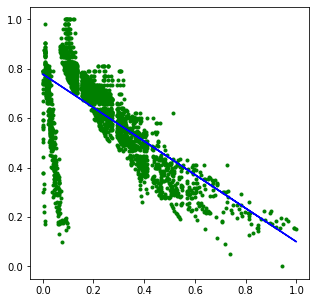

In [54]:
plt.plot(df1["Adult Mortality"].values, df1["Life expectancy "].values, 'g.',
         df1["Adult Mortality"].values, h(a, df1["Adult Mortality"].values,b), 'b')

This is the graph after training the dataset.

In [55]:
print("{0:.2f}%".format(np.sqrt(error(a, df1["Adult Mortality"],b, df1["Life expectancy "]))*100))

9.18%


We have got an error of 9.18% with our trained dataset

TESTING THE DATASET

The test dataset is 'dff'

In [59]:
dff.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)

In [62]:
print("{0:.2f}%".format(np.sqrt(error(a, df2["Adult Mortality"],b, df2["Life expectancy "]))*100))

9.18%


We have got 9.18% error with both train and test dataset.Lets try this with some new feature.

**With feature 'HIV/AIDS' and 'Alcohol'**

In [89]:
a,b=descend(a,df1["Alcohol"].values,b,df1["Life expectancy "].values,learning_rate,10000)

Error: 0.04537754256841178 | a: -0.6271847740604578 | b: 0.6450325015916254
Error: 0.021915124658282277 | a: -0.2589581873466866 | b: 0.6983860469565405
Error: 0.017086179278865448 | a: -0.04850205487030245 | b: 0.6417211960846828
Error: 0.01512144016295068 | a: 0.08573925783057064 | b: 0.6055749318133771
Error: 0.01432205240960777 | a: 0.17136660508948973 | b: 0.5825186262200772
Error: 0.01399680781350929 | a: 0.22598498189200836 | b: 0.5678118996089975
Error: 0.013864476480124545 | a: 0.2608239344000369 | b: 0.5584310468640583
Error: 0.013810635211105982 | a: 0.2830463562827895 | b: 0.5524473633055486
Error: 0.013788728968832218 | a: 0.2972211806900733 | b: 0.5486306027293097
Error: 0.013779816039042481 | a: 0.3062627535680183 | b: 0.5461960386094192


In [86]:
print("{0:.2f}%".format(np.sqrt(error(a, df1[" HIV/AIDS"],b, df1["Life expectancy "]))*100))
#with feature Hiv/Aids

10.92%


In [91]:
print("{0:.2f}%".format(np.sqrt(error(a, df1["Alcohol"],b, df1["Life expectancy "]))*100))
#with feature alcohol

11.74%


So,lets use multivariate polynomial regression to see if we can get less error percentage.